In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
thu = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', engine='python')

In [ ]:
thu

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.3-192.168.10.50-389-33898-6,192.168.10.50,33898.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113095465.0,48.0,24.0,...,32.0,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0,BENIGN
1,192.168.10.3-192.168.10.50-389-33904-6,192.168.10.50,33904.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113473706.0,68.0,40.0,...,32.0,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0,BENIGN
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0.0,8.0.6.4,0.0,0.0,6/7/2017 8:59,119945515.0,150.0,0.0,...,0.0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0,BENIGN
3,192.168.10.14-65.55.44.109-59135-443-6,192.168.10.14,59135.0,65.55.44.109,443.0,6.0,6/7/2017 8:59,60261928.0,9.0,7.0,...,20.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.14-53-59555-17,192.168.10.14,59555.0,192.168.10.3,53.0,17.0,6/7/2017 8:59,269.0,2.0,2.0,...,32.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.isnull(thu[' Label']).value_counts()

True     288602
False    170366
Name:  Label, dtype: int64

In [ ]:
cicids_files=["Wednesday-workingHours.pcap_ISCX.csv",
        "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
        "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
        "Friday-WorkingHours-Morning.pcap_ISCX.csv",
        "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
        "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"]

In [ ]:
for f in cicids_files:
  df = pd.read_csv(f, engine='python')
  df.shape
  df = df.drop(df[pd.isnull(df['Flow ID'])].index)
  df.shape
  df.to_csv(f'nullfree_{f}')

In [ ]:
nullfreecicids = (pd.concat([pd.read_csv(f'nullfree_{f}', engine='python') for f in cicids_files ])).to_csv('nullfreecicids.csv')

In [ ]:
%%time
data = pd.read_csv('nullfreecicids.csv', engine='python')

In [ ]:
data

,Unnamed: 0,Unnamed: 0.1,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.14,49459.0,209.48.71.168,80.0,6.0,5/7/2017 8:42,38308.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,1,1,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.17,49453.0,192.168.10.3,389.0,6.0,5/7/2017 8:42,479.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,2,2,192.168.10.3-192.168.10.17-88-46124-6,192.168.10.17,46124.0,192.168.10.3,88.0,6.0,5/7/2017 8:42,1095.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,3,3,192.168.10.3-192.168.10.17-389-49454-6,192.168.10.17,49454.0,192.168.10.3,389.0,6.0,5/7/2017 8:42,15206.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,4,4,192.168.10.3-192.168.10.17-88-46126-6,192.168.10.17,46126.0,192.168.10.3,88.0,6.0,5/7/2017 8:42,1092.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854911,225740,225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80.0,192.168.10.15,61374.0,6.0,7/7/2017 5:02,61.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1854912,225741,225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80.0,192.168.10.15,61378.0,6.0,7/7/2017 5:02,72.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1854913,225742,225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80.0,192.168.10.15,61375.0,6.0,7/7/2017 5:02,75.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1854914,225743,225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80.0,192.168.10.15,61323.0,6.0,7/7/2017 5:02,48.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', 

In [ ]:
data[' Label'].unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed', 'Web Attack � Brute Force',
       'Web Attack � XSS', 'Web Attack � Sql Injection', 'Infiltration',
       'Bot', 'PortScan', 'DDoS'], dtype=object)

In [ ]:
obj = []
for col in data.columns:  
  if data[col].dtype == 'object':
    obj.append(col)
data[obj]

,Flow ID,Source IP,Destination IP,Timestamp,Label
0,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.14,209.48.71.168,5/7/2017 8:42,BENIGN
1,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.17,192.168.10.3,5/7/2017 8:42,BENIGN
2,192.168.10.3-192.168.10.17-88-46124-6,192.168.10.17,192.168.10.3,5/7/2017 8:42,BENIGN
3,192.168.10.3-192.168.10.17-389-49454-6,192.168.10.17,192.168.10.3,5/7/2017 8:42,BENIGN
4,192.168.10.3-192.168.10.17-88-46126-6,192.168.10.17,192.168.10.3,5/7/2017 8:42,BENIGN
...,...,...,...,...,...
1854911,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,192.168.10.15,7/7/2017 5:02,BENIGN
1854912,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,192.168.10.15,7/7/2017 5:02,BENIGN
1854913,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,192.168.10.15,7/7/2017 5:02,BENIGN
1854914,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,192.168.10.15,7/7/2017 5:02,BENIGN


In [ ]:
obj.remove(' Label')

In [ ]:
encoder = preprocessing.LabelEncoder()
data[obj] = data[obj].apply(lambda col: encoder.fit_transform(col))

In [ ]:
data[obj]

,Flow ID,Source IP,Destination IP,Timestamp
0,329385,3733,5482,431
1,513109,3736,4394,431
2,539800,3736,4394,431
3,513110,3736,4394,431
4,539801,3736,4394,431
...,...,...,...,...
1854911,364996,12406,4388,1417
1854912,365000,12406,4388,1417
1854913,364997,12406,4388,1417
1854914,365914,12816,4388,1417


In [ ]:
data = data.drop(columns=' Timestamp')

In [ ]:
data.shape

(1854916, 86)

In [ ]:
data

,Unnamed: 0,Unnamed: 0.1,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,329385,3733,49459.0,5482,80.0,6.0,38308.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,1,1,513109,3736,49453.0,4394,389.0,6.0,479.0,11.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,2,2,539800,3736,46124.0,4394,88.0,6.0,1095.0,10.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,3,3,513110,3736,49454.0,4394,389.0,6.0,15206.0,17.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,4,4,539801,3736,46126.0,4394,88.0,6.0,1092.0,9.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854911,225740,225740,364996,12406,80.0,4388,61374.0,6.0,61.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1854912,225741,225741,365000,12406,80.0,4388,61378.0,6.0,72.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1854913,225742,225742,364997,12406,80.0,4388,61375.0,6.0,75.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1854914,225743,225743,365914,12816,80.0,4388,61323.0,6.0,48.0,2.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
data['Label'] = data[' Label'].apply(lambda x: 0 if x == "BENIGN" else 1)
data['Label'].value_counts()

0    1311105
1     543811
Name: Label, dtype: int64

In [ ]:
data = data.drop(columns=' Label')

In [ ]:
data

,Unnamed: 0,Unnamed: 0.1,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,329385,3733,49459.0,5482,80.0,6.0,38308.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1,513109,3736,49453.0,4394,389.0,6.0,479.0,11.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,2,539800,3736,46124.0,4394,88.0,6.0,1095.0,10.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,3,513110,3736,49454.0,4394,389.0,6.0,15206.0,17.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,4,539801,3736,46126.0,4394,88.0,6.0,1092.0,9.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854911,225740,225740,364996,12406,80.0,4388,61374.0,6.0,61.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1854912,225741,225741,365000,12406,80.0,4388,61378.0,6.0,72.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1854913,225742,225742,364997,12406,80.0,4388,61375.0,6.0,75.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1854914,225743,225743,365914,12816,80.0,4388,61323.0,6.0,48.0,2.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
cols = []
for col in data.columns: 
    if len(data[col].unique()) == 1:
        print(col)
        cols.append(col)

 Bwd PSH Flags
 Bwd URG Flags
Fwd Avg Bytes/Bulk
 Fwd Avg Packets/Bulk
 Fwd Avg Bulk Rate
 Bwd Avg Bytes/Bulk
 Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate


In [ ]:
cols.append('Unnamed: 0')
cols.append('Unnamed: 0.1')
cols

[' Bwd PSH Flags',
 ' Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate',
 'Unnamed: 0',
 'Unnamed: 0.1']

In [ ]:
data = data.drop(columns=cols)

In [ ]:
data = data.drop(columns=['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Init_Win_bytes_backward', 'Init_Win_bytes_forward'])

In [ ]:
data.shape

(1854916, 69)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854916 entries, 0 to 1854915
Data columns (total 69 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Protocol                     float64
 1    Flow Duration                float64
 2    Total Fwd Packets            float64
 3    Total Backward Packets       float64
 4   Total Length of Fwd Packets   float64
 5    Total Length of Bwd Packets  float64
 6    Fwd Packet Length Max        float64
 7    Fwd Packet Length Min        float64
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         float64
 11   Bwd Packet Length Min        float64
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [ ]:
data.describe()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06,...,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06,1.854916e+06
mean,9.409402e+00,1.700471e+07,8.480754e+00,9.228245e+00,5.587151e+02,1.429638e+04,2.206059e+02,1.781830e+01,6.265795e+01,7.675405e+01,...,2.607985e+01,8.743598e+04,3.919917e+04,1.527578e+05,6.484268e+04,1.090936e+07,6.750810e+05,1.141699e+07,1.039509e+07,2.931728e-01
std,5.092923e+00,3.560791e+07,6.703865e+02,8.913627e+02,1.155774e+04,2.028179e+06,8.204898e+02,6.937893e+01,2.174703e+02,3.304030e+02,...,6.662925e+00,6.714164e+05,3.998828e+05,1.019133e+06,6.001208e+05,2.732153e+07,5.473405e+06,2.816134e+07,2.705379e+07,4.552171e-01
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,1.130000e+02,1.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,3.133500e+04,2.000000e+00,2.000000e+00,5.700000e+01,1.160000e+02,3.500000e+01,2.000000e+00,3.200000e+01,0.000000e+00,...,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.700000e+01,5.229868e+06,5.000000e+00,5.000000e+00,2.470000e+02,8.600000e+02,1.130000e+02,3.400000e+01,4.900000e+01,2.616295e+01,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.700000e+01,1.200000e+08,2.079640e+05,2.846020e+05,1.290000e+07,6.270000e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.049469e+03,...,6.000000e+01,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08,1.000000e+00


In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)
data.astype(float)

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6.0,38308.0,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,479.0,11.0,5.0,172.0,326.0,79.0,0.0,15.636364,31.449238,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,1095.0,10.0,6.0,3150.0,3150.0,1575.0,0.0,315.000000,632.561635,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,15206.0,17.0,12.0,3452.0,6660.0,1313.0,0.0,203.058823,425.778474,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.0,1092.0,9.0,6.0,3150.0,3152.0,1575.0,0.0,350.000000,694.509719,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854911,6.0,61.0,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1854912,6.0,72.0,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1854913,6.0,75.0,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1854914,6.0,48.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = data['Label'].values
X = data.drop(columns=['Label'])

In [ ]:
data.columns

Index([' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count', ' RST Fl

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=250, random_state=42, oob_score=True)
forest.fit(X_train, y_train)

/opt/jupyterhub/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


CPU times: user 1h 27min 19s, sys: 13.2 s, total: 1h 27min 32s
Wall time: 1h 27min 34s


RandomForestClassifier(n_estimators=250, oob_score=True, random_state=42)

In [ ]:
forest.feature_importances_

array([5.63820961e-03, 1.00793076e-02, 1.10695071e-02, 1.28582148e-02,
       4.38088618e-02, 2.82290322e-02, 2.51786233e-02, 7.80713581e-03,
       1.72807529e-02, 4.33569199e-03, 4.19024961e-02, 1.15212561e-02,
       5.73136999e-02, 5.28848458e-02, 1.04748167e-02, 7.52447984e-03,
       8.12841492e-03, 6.42373481e-03, 1.51787638e-02, 4.81259272e-03,
       7.26326154e-03, 7.98958516e-03, 1.78985207e-02, 1.05433475e-02,
       9.97018818e-03, 2.64160877e-03, 2.91574985e-03, 1.14645156e-03,
       3.06273567e-03, 1.90737496e-03, 1.79030131e-04, 2.80185099e-05,
       1.67743579e-02, 3.23633281e-02, 5.87756610e-03, 1.15111828e-02,
       1.25892757e-02, 3.73578823e-02, 4.13981312e-02, 4.75979760e-02,
       3.89746001e-02, 2.14901360e-03, 1.57469974e-04, 1.60989314e-07,
       3.74404669e-03, 5.37528901e-03, 1.19304936e-02, 4.42056288e-05,
       7.70006279e-08, 3.91716772e-03, 6.85971072e-02, 1.93362868e-02,
       5.40532614e-02, 1.53977930e-02, 1.40231018e-02, 3.72612500e-02,
      

In [ ]:
features = X.columns
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
features_list = []

for i in indices[:20]:
    features_list.append(features[i])
    print(f'{importances[i]} {features[i]}')

0.06859710715361128  Average Packet Size
0.05731369985776462  Bwd Packet Length Mean
0.05405326142050193  Avg Bwd Segment Size
0.05288484576974641  Bwd Packet Length Std
0.04759797604558511  Packet Length Std
0.04380886177446966 Total Length of Fwd Packets
0.04190249606769298 Bwd Packet Length Max
0.0413981312076008  Packet Length Mean
0.03897460007277066  Packet Length Variance
0.03735788233940106  Max Packet Length
0.03726125004510987  Subflow Fwd Bytes
0.035117529923094026  Subflow Bwd Bytes
0.03236332809578348  Bwd Header Length
0.028229032169227914  Total Length of Bwd Packets
0.025178623284889116  Fwd Packet Length Max
0.019336286789262063  Avg Fwd Segment Size
0.017898520723926642  Fwd IAT Std
0.017280752948115114  Fwd Packet Length Mean
0.016774357858103255  Fwd Header Length
0.015397792965188464  Fwd Header Length.1


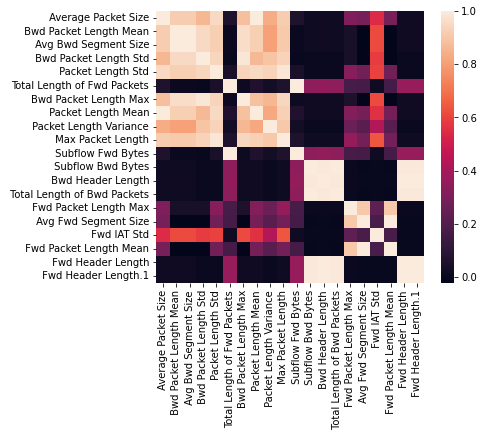

In [ ]:
import seaborn as sns

corr_matrix = data[features_list].corr()
plt.rcParams['figure.figsize'] = (6, 5)
sns.heatmap(corr_matrix);
plt.savefig('corr_heatmap.png', dpi=300)

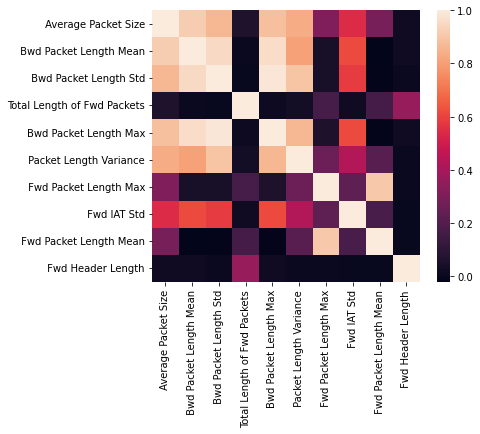

In [ ]:
lim_list = [' Average Packet Size', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Total Length of Fwd Packets', 'Bwd Packet Length Max', ' Packet Length Variance', ' Fwd Packet Length Max', ' Fwd IAT Std',
       ' Fwd Packet Length Mean', ' Fwd Header Length']
corr_matrix = data[lim_list].corr()
plt.rcParams['figure.figsize'] = (6, 5)
sns.heatmap(corr_matrix);

In [ ]:
data.to_csv('total_CICIDS.csv', encoding='utf-8')    

In [ ]:
data1 = pd.read_csv('total_CICIDS.csv')

In [ ]:
data1

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,6.0,38308.0,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,6.0,479.0,11.0,5.0,172.0,326.0,79.0,0.0,15.636364,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,6.0,1095.0,10.0,6.0,3150.0,3150.0,1575.0,0.0,315.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,6.0,15206.0,17.0,12.0,3452.0,6660.0,1313.0,0.0,203.058823,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,6.0,1092.0,9.0,6.0,3150.0,3152.0,1575.0,0.0,350.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854911,1854911,6.0,61.0,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1854912,1854912,6.0,72.0,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1854913,1854913,6.0,75.0,1.0,1.0,6.0,6.0,6.0,6.0,6.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1854914,1854914,6.0,48.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
data1= data1.drop(columns=['Unnamed: 0'])

In [ ]:
y = data1['Label'].values
X = data1[lim_list]
print(X.shape, y.shape)

(1854916, 10) (1854916,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_cl = RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3, n_estimators=50, random_state=42, oob_score=True)

In [ ]:
%%time
forest_cl.fit(X_train, y_train)

/opt/jupyterhub/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


CPU times: user 17min 1s, sys: 312 ms, total: 17min 1s
Wall time: 17min 1s


RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3,
                       n_estimators=50, oob_score=True, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = forest_cl.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[382043,  11136],
       [  1298, 161998]])

In [ ]:
import sklearn.metrics as metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print('Precision -', precision)
print('Recall -', recall)
print('F1  ', f1)
print('Accuracy -', accuracy)

Precision - 0.9356798780135618
Recall - 0.9920512443660592
F1   0.9630413458966204
Accuracy - 0.9776557796846219
